In [1]:
from schemdraw.logic.kmap import Kmap

# Logic gates

Logic gates are digital elements which implements the boolean operations as per [boolean algebra](./boolean_algebra.ipynb).

The following are the basic logic gates:

| Name | Symbol | $F$ |
| :---: | :---: | :---: |
| AND | ![and](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/AND_ANSI_Labelled.svg/120px-AND_ANSI_Labelled.svg.png) | $$AB$$ |
| OR |![or](https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/OR_ANSI_Labelled.svg/120px-OR_ANSI_Labelled.svg.png) | $$A + B$$ |
| NOT |![not](https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/NOT_ANSI_Labelled.svg/120px-NOT_ANSI_Labelled.svg.png) | $$\bar A$$ |
| NAND |![nand](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/NAND_ANSI_Labelled.svg/120px-NAND_ANSI_Labelled.svg.png) | $$\bar{AB}$$ |
| NOR |![nor](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/NOR_ANSI_Labelled.svg/120px-NOR_ANSI_Labelled.svg.png) | $$\bar{A + B}$$ |
| Buffer|![buffer](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Buffer_ANSI_Labelled.svg/120px-Buffer_ANSI_Labelled.svg.png) | $$A$$ |

*Symbol images obtained from Wikipedia*

## Positive and negative logic

In our circuit, we can either assign a high voltage to logical true or logical false.
This corresponds to positive and negative logic respectively.

* Positive logic (active high):
    * High voltage is logic 1
    * Low voltage is logic 0
    * $X.H$ is the logic value of $X$ in positive logic
* Negative logic (active low):
    * High voltage is logic 0
    * Low voltage is logic 1
    * $X.L$ is the logic value of $X$ in negative logic

Suppose that we have a physical gate with the following truth table:

| A | B | F |
| --- | --- | --- |
| L | L | L |
| L | H | L |
| H | L | L |
| H | H | H |

Under positive logic, it maps to 

| A.H | B.H | F.H |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

which means it is an AND gate.

Under negative logic, it maps to 

| A.L | B.L | F.L |
| --- | --- | --- |
| 1 | 1 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

which means it is an OR gate.

Hence, the same physical gate can either be an AND or OR gate, depending on which logic we are operating under.

To get convert the logic type, we simply invert the input and output of the gate.
This requires the applying [De morgan's law](./boolean_algebra.ipynb#Theorems-of-boolean-algebra).

For example, 
$$
F.H = A.H \cdot B .H \\
\overline{F.H} = \overline{A.H \cdot B .H} = \overline{A.H} + \overline{B.H} \\
F.L = A.L + B.L \\
$$

## Boolean function simplification

Since the cost of the circuit is related to the amount of logic gates used, it would be in our interest to reduce the number of logic gates needed to represent our function.

### Algebra manipulation

We can use axioms and theorems to simplify down the function.

Some commonly used theorems as:
* $AB + A\bar B = A$
* $A + \bar A B = A + B$
* $AB + \bar A C + BC = AB + \bar A C$

We can keep applying the 3 theorems above until it cannot be applied.

For example:

$$
\begin{align}
F(A,B,C,D) &= A B \bar C + ABC + BCD +  \bar ACD + A \bar B \bar C D &\\
&= A B(C + \bar C) + BCD +  \bar ACD + A \bar B \bar C D & C + \bar C = 1\\
&= A B + BCD +  \bar ACD + A \bar B \bar C D &\\
&= A (B + \bar B \bar C D) + BCD +  \bar ACD &\\
&= A (B + \bar C D) + BCD +  \bar ACD & A + \bar A B = A + B\\
&= A B + A \bar C D + BCD +  \bar ACD &\\
&= (A B +\bar ACD + BCD) + A\bar CD & (AB + \bar A C + BC = AB + \bar A C)\\
&= A B +\bar ACD  + A\bar CD &\\
\end{align}
$$

We needed 3 inverters + 5 AND gates + 1 OR gates = 9 logic gates in the original function.
In our new function, we need 2 inverters + 3 AND and 1 OR gate = 6 logic gates.
This gives us a 33.33% reduction in gate usage.

This method of simplification usually results to a representation that is close to minimal.
However, it can be rather difficult to do by hand for a function with a large number of variables.

### Karnaugh Map (K-Map)

A **K-map** is a diagram which consists of squares, where each represent a minterm/maxterm of a boolean function.
One can view it as a 2-D truth table.

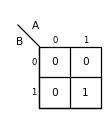

In [2]:
truthtable = [
    ("11", "1"),
]
Kmap("AB", truthtable=truthtable)

The above is a K-map for a AND gate.

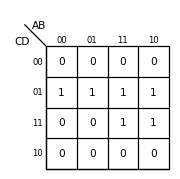

In [3]:
truthtable = [
    ("0001", "1"),
    ("0101", "1"),
    ("1101", "1"),
    ("1001", "1"),
    ("1111", "1"),
    ("1011", "1"),
]
Kmap("ABCD", truthtable=truthtable)

And the above is for the function:
$$
\bar A \bar B \bar C D + \bar A B \bar C D + A B C D + A\bar B\bar CD + ABCD + A \bar B CD
$$

Note that the arrangement of variable values are such that only 1 bit changes as you move down the row/across the columns.
That is why the sequence is `00, 01, 11, 10`, rather than the typical `00, 01, 10, 11`.

#### Grouping

To perform minimization of the expressions, we need to group the terms together.
The grouping follows the following rules.

X is 1 for sum of product, and 0 for product of sum
1. Groups must contain only cells that contains X
2. All cells with X must be part of some group
3. Groups must form rectangles with dimensions of $2^n \times 2^m$, where $n,m$ are positive integers
4. Groups can overlap
5. Groups should be as large as possible
6. Groups can "wrap" around the table
7. Number of groups should be minimal

Rule 5 mean that we would prefer the second grouping over the first below.

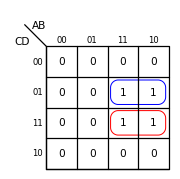

In [4]:
truthtable = [
    ("1101", "1"),
    ("1111", "1"),
    ("1001", "1"),
    ("1011", "1"),
]
Kmap(
    "ABCD",
    truthtable=truthtable,
    groups={"1.01": {"color": "blue"}, "1.11": {"color": "red"}},
)

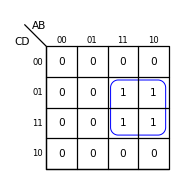

In [5]:
Kmap("ABCD", truthtable=truthtable, groups={"1..1": {"color": "blue"}})

Rule 6 means that we can group as per below:

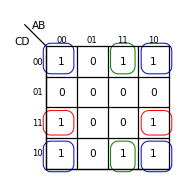

In [6]:
truthtable = [
    ("0000", "1"),
    ("0011", "1"),
    ("0010", "1"),
    ("1100", "1"),
    ("1110", "1"),
    ("1011", "1"),
    ("1000", "1"),
    ("1010", "1"),
]
Kmap(
    "ABCD",
    truthtable=truthtable,
    groups={
        ".0.0": {"color": "blue"},
        ".011": {"color": "red"},
        "11.0": {"color": "green"},
    },
)

where there are 3 groups.

#### Minimization of sum of product

To minimize the sum of products, we will be grouping the 1's in the K-map.

We would obtain this following groups for our initial examples:

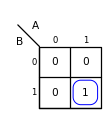

In [7]:
truthtable = [
    ("11", "1"),
]
Kmap("AB", truthtable=truthtable, groups={"11": {"color": "blue"}})

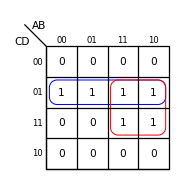

In [8]:
truthtable = [
    ("0001", "1"),
    ("0101", "1"),
    ("1101", "1"),
    ("1001", "1"),
    ("1111", "1"),
    ("1011", "1"),
]
Kmap(
    "ABCD",
    truthtable=truthtable,
    groups={
        "..01": {"color": "blue"},
        "1..1": {"color": "red"},
    },
)

Once we get the groupings, we write down all the variables whose values did not change within the group.
We then take the sum of the corresponding minterms to get our minimized expression.

For our examples, it would be the following respectively
$$
AB
$$

$$
\bar C D + AD
$$

Notice that the minimized expressions is much shorter than the original expression for the 2nd example.

#### Minimization of product of sum

To minimize the sum of products, we will be grouping the 0's in the K-map.

We would obtain this following groups for our initial examples:

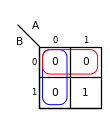

In [9]:
truthtable = [
    ("11", "1"),
]
Kmap(
    "AB",
    truthtable=truthtable,
    groups={
        "0.": {"color": "blue"},
        ".0": {"color": "red"},
    },
)

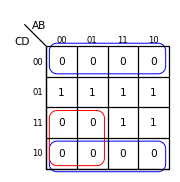

In [10]:
truthtable = [
    ("0001", "1"),
    ("0101", "1"),
    ("1101", "1"),
    ("1001", "1"),
    ("1111", "1"),
    ("1011", "1"),
]
Kmap(
    "ABCD",
    truthtable=truthtable,
    groups={
        "...0": {"color": "blue"},
        "0.1.": {"color": "red"},
    },
)

Similarly, we then take the product of the corresponding maxterms to get our minimized expression.

Hence, the product of sums are:
$$
(A)(B)
$$

$$
(D)(A + \bar C)
$$

#### Don't-care condition

Sometimes, in our design, we have some input where we do not care about the output.
For example, a digital counter whose numbers are represented as 4 bit numbers, but can only display from $0-9$.
We would treat the input corresponding to $10-16$ as "don't care" conditions.

In our K-map, we will write an X to denote these conditions.
When minimizing, we can treat each X as either 0 or 1, whichever leads to a more minimal expression.

#### Optimality

(Note that the below is simply a formal definition of the grouping rules)

Each product term in a sum of product is called an **implicant**.

A **prime implicant** is an implicant that cannot be combined with another term to eliminate a variable.

An **essential prime implicant** is a prime implicant that is not included in other prime implicants.

For a sum of product to be minimal, it must *contain all the essential prime implicants, while containing the minimal number of literals and terms*.